In [20]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
import pandas as pd
import os
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt

class DiceDataset(Dataset):
    def __init__(self, csv_file, root_dir, transform=None):
        self.pips_set = pd.read_csv(csv_file, header=None)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.pips_set)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = os.path.join(self.root_dir,
                                f'dice_{idx:03}.jpg')
        image = io.imread(img_name)
        pips = self.pips_set.iloc[idx]
        pips = np.array(pips)
        sample = {'image': torch.from_numpy(image), 'pips': torch.from_numpy(pips)}

        if self.transform:
            sample = self.transform(sample)

        return sample

0 torch.Size([180, 240, 3]) torch.Size([2])
1 torch.Size([180, 240, 3]) torch.Size([2])
2 torch.Size([180, 240, 3]) torch.Size([2])
3 torch.Size([180, 240, 3]) torch.Size([2])


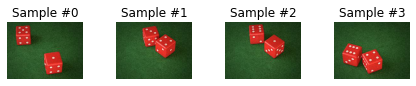

In [21]:
dice_set = DiceDataset("data/pip_data.txt", "data/images/")

fig = plt.figure()

for i in range(len(dice_set)):
    sample = dice_set[i]

    print(i, sample['image'].shape, sample['pips'].shape)

    ax = plt.subplot(1, 4, i + 1)
    plt.tight_layout()
    ax.set_title('Sample #{}'.format(i))
    ax.axis('off')
    plt.imshow(sample['image'])
    if i == 3:
        plt.show()
        break

In [30]:
ns = len(dice_set)
train_dataset, test_dataset = torch.utils.data.random_split(dice_set, [int(ns*0.7), int(ns*0.3)])